In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df.head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data to do :
1. Extract the Master
2. fill in age based on Pclass, Sex, and Master
3. Extract family name
4. Extract Ticket Prefix

Make family name column

In [22]:
family_name = []
for i in range(0,891):
    family_name.append(df['Name'].str.split(",")[i][0])

In [27]:
df['family name']=family_name

Checking for Nulls

In [36]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
family name      0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [202]:
ticket_number=[]
for ticket in df['Ticket']:
    ticket_number.append(re.findall('\d+\s?$',ticket) or ['0'])
    
ticket_number = [e for l in ticket_number for e in l]

In [204]:
df['ticket_number'] = ticket_number

In [170]:
df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [241]:
df.groupby(['family name','Ticket']).count().tail(30)

PassengerId  Survived  Pclass  Name  Sex  \
family name      Ticket                                                       
White            35281                       2         2       2     2    2   
Wick             36928                       2         2       2     2    2   
Widegren         347064                      1         1       1     1    1   
Widener          113503                      1         1       1     1    1   
Wiklund          3101267                     1         1       1     1    1   
Wilhelms         244270                      1         1       1     1    1   
Willey           S.O./P.P. 751               1         1       1     1    1   
Williams         244373                      1         1       1     1    1   
                 54636                       1         1       1     1    1   
                 A/5 2466                    1         1       1     1    1   
                 PC 17597                    1         1       1     1    1   
Williams-Lambert 113510                      1         1       1     1    1   
Windelov         SOTON/OQ 3101317            1         1       1     1    1   
Wiseman          A/4. 34244                  1         1       1     1    1   
Woolner          19947                       1         1       1     1    1   
Wright           113807                      1         1       1     1    1   
Yasbeck          2659                        2         2       2     2    2   
Young            PC 17760                    1         1       1     1    1   
Youseff          2628                        1         1       1     1    1   
Yousif           2647                        1         1       1     1    1   
Yousseff         2627                        1         1       1     1    1   
Yrois            248747                      1         1       1     1    1   
Zabour           2665                        2         2       2     2    2   
Zimmerman        315082                      1         1       1     1    1   
de Messemaeker   345572                      1         1       1     1    1   
de Mulder        345774                      1         1       1     1    1   
de Pelsmaeker    345778                      1         1       1     1    1   
del Carlo        SC/PARIS 2167               1         1       1     1    1   
van Billiard     A/5. 851                    1         1       1     1    1   
van Melkebeke    345777                      1         1       1     1    1   

                                   Age  SibSp  Parch  Fare  Cabin  Embarked  \
family name      Ticket                                                       
White            35281               2      2      2     2      2         2   
Wick             36928               2      2      2     2      1         2   
Widegren         347064              1      1      1     1      0         1   
Widener          113503              1      1      1     1      1         1   
Wiklund          3101267             1      1      1     1      0         1   
Wilhelms         244270              1      1      1     1      0         1   
Willey           S.O./P.P. 751       0      1      1     1      0         1   
Williams         244373              0      1      1     1      0         1   
                 54636               1      1      1     1      0         1   
                 A/5 2466            0      1      1     1      0         1   
                 PC 17597            1      1      1     1      0         1   
Williams-Lambert 113510              0      1      1     1      1         1   
Windelov         SOTON/OQ 3101317    1      1      1     1      0         1   
Wiseman          A/4. 34244          0      1      1     1      0         1   
Woolner          19947               0      1      1     1      1         1   
Wright           113807              1      1      1     1      0         1   
Yasbeck          2659                2      2      2     2      0         2   
Young

In [141]:
df['ticket_number']=ticket_number

Check if there's Master prefix

In [256]:
master=[]
for name in df['Name']:
    if re.findall('Master',name) or ['None'] == 'Master':
        master.append(True)
    else:
        master.append(False)

df['master']=master

### Age Fix

In [268]:
age_fill = df[df['Age'].isnull()!=True].groupby(['Sex','Pclass','master']).mean().round(1)

In [277]:
age_fill

PassengerId  Survived   Age  SibSp  Parch   Fare
Sex    Pclass master                                                  
female 1      False         478.3       1.0  34.6    0.5    0.5  107.9
       2      False         442.9       0.9  28.7    0.5    0.6   22.0
       3      False         406.5       0.5  21.8    0.8    1.0   15.9
male   1      False         449.9       0.4  42.4    0.4    0.3   69.7
              True          518.3       1.0   5.3    0.7    2.0  117.8
       2      False         449.0       0.1  33.6    0.3    0.1   20.5
              True          463.6       1.0   2.3    0.9    1.2   27.3
       3      False         460.3       0.1  28.7    0.2    0.1   10.5
              True          406.6       0.4   5.4    2.9    1.4   27.6

In [553]:
df_fill = pd.merge(df[df['Age'].isnull()==True],
         age_fill['Age'],
         on=['Sex','Pclass','master'],
         how='inner'
        )
df_fill.drop('Age_x',axis=1,inplace=True)
df_fill.rename(columns={'Age_y':'Age'},inplace=True)
df_fill.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family name,ticket_number,master,Age
0,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,Moran,330877,False,28.7
1,27,0,3,"Emir, Mr. Farred Chehab",male,0,0,2631,7.2250,NaN,C,Emir,2631,False,28.7
2,30,0,3,"Todoroff, Mr. Lalio",male,0,0,349216,7.8958,NaN,S,Todoroff,349216,False,28.7
3,37,1,3,"Mamee, Mr. Hanna",male,0,0,2677,7.2292,NaN,C,Mamee,2677,False,28.7
4,43,0,3,"Kraeff, Mr. Theodor",male,0,0,349253,7.8958,NaN,C,Kraeff,349253,False,28.7


In [561]:
df_complete = pd.merge(df[df['Age'].isnull()!=True],
                       df_fill,
                       how='outer',
                       indicator=True)

(891, 16)

### Passengers with the Same Ticket number


In [557]:
family_travel = df[df['Cabin'].isnull()==False].groupby(['Ticket']).count()
family_travel = family_travel[family_travel['PassengerId']>=0].reset_index()
family_travel.rename(columns = {'PassengerId':'ticket_count'},inplace=True)
family_travel = family_travel[['Ticket','ticket_count']]

In [562]:
df_complete = pd.merge(df_complete,
        family_travel,
        on=['Ticket'],
        how='outer')
df_complete.shape

(891, 17)

In [571]:
df_complete.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
family name        0
ticket_number      0
master             0
_merge             0
ticket_count     676
name_count         0
dtype: int64

In [ ]:
# df_complete['same_ticket']=df_complete['Ticket'].isin(family_travel['Ticket'])

### Passengers with the Same Surname

In [564]:
family_name = df[['family name', 'PassengerId']].groupby('family name').count().reset_index()
family_name = family_name[family_name['PassengerId']>0]
family_name.rename(columns = {'PassengerId':'name_count'},inplace=True)
family_name

,family name,name_count
0,Abbing,1
1,Abbott,2
2,Abelson,2
3,Adahl,1
4,Adams,1
...,...,...
662,de Mulder,1
663,de Pelsmaeker,1
664,del Carlo,1
665,van Billiard,1


In [565]:
df_complete = pd.merge(df_complete,
        family_name,
        on=['family name'],
        how='outer')
df_complete.shape

(891, 18)

In [ ]:
# df_complete['same_surname']=df_complete['family name'].isin(family_name['family name'])


### Selecting Columns for Training

In [600]:
df_select = df_complete[['PassengerId','Survived','Pclass','Sex','Age','Fare','ticket_number','name_count']]

In [601]:
df_select['Sex']=df_select['Sex'].astype('category')
df_select['master']=df_select['master'].astype('bool')

<ipython-input-601-4593dbbb3366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Sex']=df_select['Sex'].astype('category')


KeyError: 'master'

In [602]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Sex            891 non-null    category
 4   Age            891 non-null    float64 
 5   Fare           891 non-null    float64 
 6   ticket_number  891 non-null    object  
 7   name_count     891 non-null    int64   
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 56.7+ KB


In [594]:
df_select

,PassengerId,Survived,Pclass,Age,Fare,ticket_number,master,name_count,Sex_female,Sex_male
0,1,0,3,22.0,7.2500,21171,False,2,0,1
1,478,0,3,29.0,7.0458,3460,False,2,0,1
2,2,1,1,38.0,71.2833,17599,False,1,1,0
3,3,1,3,26.0,7.9250,3101282,False,1,1,0
4,4,1,1,35.0,53.1000,113803,False,2,1,0
...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,42.4,39.6000,112379,False,1,0,1
887,816,0,1,42.4,0.0000,112058,False,1,0,1
888,840,1,1,42.4,29.7000,11774,False,1,0,1
889,66,1,3,5.4,15.2458,2661,True,2,0,1


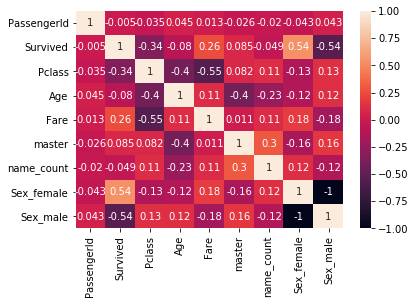

In [599]:
sns.heatmap(df_select.corr(),annot=True)

In [603]:
df_select = pd.get_dummies(data = df_select,columns = ['Sex'],drop_first=False)

In [399]:
from sklearn.model_selection import train_test_split

In [604]:
X = df_select.drop(['Survived','PassengerId'],axis=1)
y = df_select['Survived']

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [606]:
from sklearn.ensemble import RandomForestClassifier


In [612]:
rfc = RandomForestClassifier(n_estimators=1000)

In [613]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [614]:
pred = rfc.predict(X_test)

In [615]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [616]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[146  15]
 [ 28  79]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       161
           1       0.84      0.74      0.79       107

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

